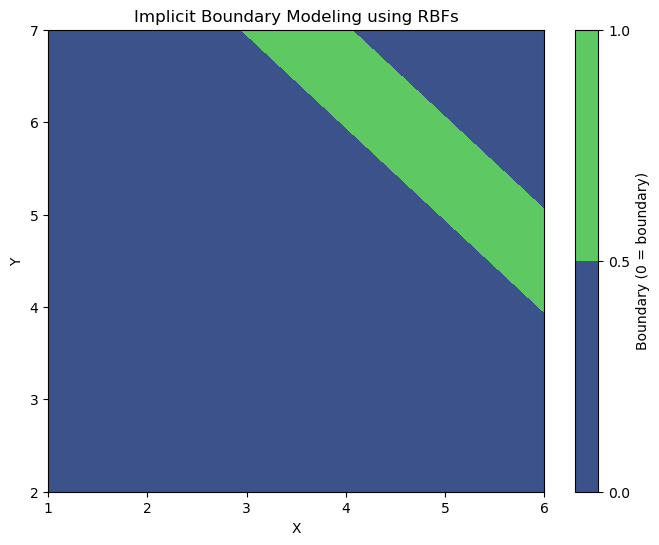

In [1]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt

data = np.array([
    [1, 2, 3, -1],
    [2, 3, 4, -1],
    [3, 4, 5, -1],
    [4, 5, 6, 1],
    [5, 6, 7, 1],
    [6, 7, 8, 1]
])


coords = data[:, :3]  # (x, y, z)
signed_distances = data[:, 3]  # Signed distances


rbf = Rbf(coords[:, 0], coords[:, 1], coords[:, 2], signed_distances, function='thin_plate')


x_grid, y_grid, z_grid = np.meshgrid(
    np.linspace(1, 6, 10),
    np.linspace(2, 7, 10),
    np.linspace(3, 8, 10),
    indexing='ij'
)


interpolated_distances = rbf(x_grid, y_grid, z_grid)


boundary = np.abs(interpolated_distances) < 0.1


plt.figure(figsize=(8, 6))
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], boundary[:, :, 0], cmap='viridis')
plt.colorbar(label="Boundary (0 = boundary)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Implicit Boundary Modeling using RBFs")
plt.show()